In [19]:
# Modelo Deep Learning que determina el precio de una casa en un barrio de Boston a mediados de los años 70
# Dataset: keras.boston_housing

import numpy as np
import tensorflow as tf
from tensorflow import keras

from keras import models, layers
from keras.datasets import boston_housing

(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

In [20]:
mean = train_data.mean(axis=0)
train_data -= mean

std = train_data.std(axis=0)
train_data /= std

test_data -= mean
test_data /= std

In [21]:
# Definición del modelo
def build_model():

    # Sequential model, the simplest type of Keras model
    model = models.Sequential()

    # Input_shape=13: Especifica que cada muestra tiene 13 características (1D array)
    model.add(layers.Input(shape=(13,)))

    # Core of the model: 3 Dense layers

    # units=64: This specifies there are 64 neurons in this layer
    # Activation function for the neuron: 'relu'
    model.add(layers.Dense(64, activation='relu'))

    # units=64: This specifies there are 64 neurons in this layer
    # Activation function for the neuron: 'relu'
    model.add(layers.Dense(64, activation='relu'))

    # units=1: This specifies there are 1 neuron in this layer
    # Activation function for the neuron: none
    model.add(layers.Dense(1))

    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

    return model

In [22]:
# k = 4
k = 4

num_val_samples = len(train_data) // k
num_epochs = 500
all_mae_histories = []

for i in range(k):
    print('processing fold #', i)
    val_data = train_data[i * num_val_samples: (i+1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i+1) * num_val_samples]

    partial_train_data = np.concatenate([train_data[:i * num_val_samples], train_data[(i+1) * num_val_samples:]], axis=0)
    partial_train_targets = np.concatenate([train_targets[:i * num_val_samples], train_targets[(i+1) * num_val_samples:]], axis=0)

    model = build_model()
    
    # Entrenamiento
    history = model.fit(partial_train_data, partial_train_targets, validation_data=(val_data, val_targets), epochs=num_epochs, batch_size=1, verbose=0)

    # 'loss' en lugar de 'val_mean_absolute_error' ya que es la única clave que aparece en history.history
    mae_history = history.history['mae']
    all_mae_histories.append(mae_history)
    

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [31]:
average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]
    

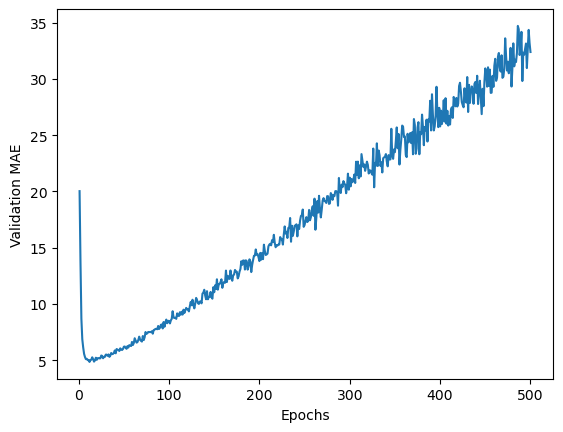

In [32]:
import matplotlib.pyplot as plt

plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

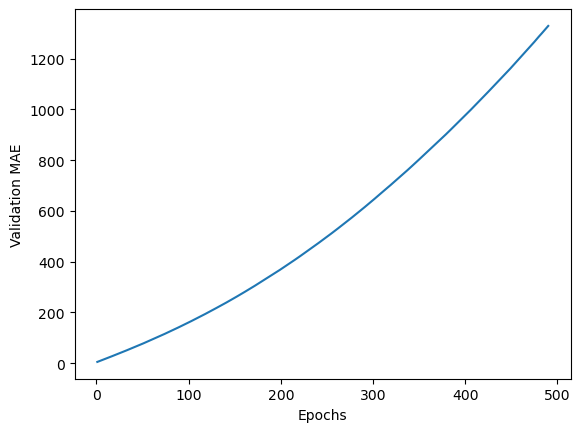

In [35]:
# Omitimos los 10 primeros puntos de datos
# Sustituimos cada punto con una media móvil exponencial de los puntos anteriores -> para obtener una curva fluida
def smooth_curve(points, factor=0.9):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous + factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points

smooth_mae_history = smooth_curve(average_mae_history[10:])

plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()